In [24]:
print("all ok")

all ok


In [ ]:
from langchain_groq import ChatGroq
import os

# Read API key from environment (recommended)
# PowerShell: $env:GROQ_API_KEY="..."
# cmd: set GROQ_API_KEY=...
if not os.environ.get("GROQ_API_KEY"):
    raise ValueError("Missing GROQ_API_KEY environment variable.")

# Use a Groq model that supports tool calling
llm = ChatGroq(
    model_name="llama3-groq-70b-8192-tool-use-preview",
    temperature=0,
)

response = llm.invoke("what is length of wall of china?")
print(response.content)

The Great Wall of China is approximately 13,171 miles (21,196 kilometers) long, according to the National Cultural Heritage Administration of China. However, it's worth noting that the exact length is difficult to measure accurately, as the wall is not a single, continuous structure, but rather a series of separate sections built over time.

The wall stretches across China's northern border, from the eastern coast to the western frontier, and its length has varied over the centuries due to the construction of new sections and the destruction of others. The most commonly cited length is around 4,000-5,000 miles (6,400-8,000 kilometers), but this is likely an underestimate.

In 2012, the Chinese government conducted a survey and announced that the wall was approximately 13,171 miles (21,196 kilometers) long, which is the figure I mentioned earlier. However, some estimates put the length at over 18,000 miles (29,000 kilometers), although these figures are not universally accepted.

It's w

In [3]:
response.content

"The Great Wall of China is approximately 13,171 miles (21,196 kilometers) long, according to the National Cultural Heritage Administration of China. However, it's worth noting that the exact length is difficult to measure accurately, as the wall is not a single, continuous structure, but rather a series of separate sections built over time.\n\nThe wall stretches across China's northern border, from the eastern coast to the western frontier, and its length has varied over the centuries due to the construction of new sections and the destruction of others. The most commonly cited length is around 4,000-5,000 miles (6,400-8,000 kilometers), but this is likely an underestimate.\n\nIn 2012, the Chinese government conducted a comprehensive survey of the wall and announced that its total length was approximately 13,171 miles (21,196 kilometers). This measurement includes all the branches, spurs, and parallel sections of the wall, as well as the watchtowers, beacon towers, and other associate

In [4]:

from langchain.tools import tool

## This is my custom tools

In [ ]:
from langchain.tools import tool

@tool
def multiply(a: float, b: float) -> float:
    """Multiply two numbers."""
    return a * b


@tool
def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b


@tool
def divide(a: float, b: float) -> float:
    """Divide two numbers."""
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

## importing the inbuilt tool

In [7]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [8]:
search.invoke("what is the latest update on iphone17 release?")

"The iPhone 17 is a smartphone developed and marketed by Apple that is part of the nineteenth generation of the iPhone. Succeeding the iPhone 16, the device was announced alongside the higher-priced, refreshed iPhone 17 Pro and 17 Pro Max and the new iPhone Air during an Apple Event at Apple Park in Cupertino, California, on September 9, 2025 ... Dec 14, 2025 · Apple is about to release an update for every iPhone that can run iOS 26, for users who don’t want it. And it’s probably the last chance to avoid iOS 26. We covered the Apple event below, and you can read our minute-by-minute account below of all of the company's announcements, along with updates as we get some hands-on time with the new phones... Sep 9, 2025 · iPhone 17 introduces N1, a new Apple-designed wireless networking chip that enables Wi-Fi 7, Bluetooth 6, and Thread. In addition to the latest generation of wireless technologies, N1 improves the overall performance and reliability of features like Personal Hotspot and A

In [9]:
tools=[multiply, add, divide, search]

In [10]:
llm_with_tools=llm.bind_tools(tools)

In [11]:
response=llm_with_tools.invoke("hi")

In [12]:
response.content

"I'm here to help with any questions or tasks you may have. What's on your mind?"

In [13]:
response.tool_calls

[]

In [28]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [29]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ne02he4qg', 'function': {'arguments': '{"query":"TATA Group age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 650, 'total_tokens': 670, 'completion_time': 0.051019167, 'completion_tokens_details': None, 'prompt_time': 0.033866534, 'prompt_tokens_details': None, 'queue_time': 0.008506507, 'total_time': 0.084885701}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_dae98b5ecb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b4b13-8fe3-7f11-9c79-4fe39ae8d880-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'TATA Group age'}, 'id': 'ne02he4qg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 650, 'output_tokens': 20, 'total_tokens': 670})

In [30]:
response.content

''

In [31]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group age'},
  'id': 'ne02he4qg',
  'type': 'tool_call'}]

In [32]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [33]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [34]:
user_query=["tell me what is 2+2"]

In [35]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [ ]:
from typing import Any, TypedDict

from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage

# Prefer LangGraph's MessagesState if available; otherwise define a compatible fallback.
try:
    from langgraph.graph import MessagesState  # type: ignore
except Exception:
    class MessagesState(TypedDict):
        messages: list[Any]


def _normalize_messages(messages: list[Any]) -> list[BaseMessage]:
    normalized: list[BaseMessage] = []
    for msg in messages:
        if isinstance(msg, str):
            normalized.append(HumanMessage(content=msg))
        else:
            normalized.append(msg)
    return normalized


def function_1(state: MessagesState):
    user_messages = _normalize_messages(state["messages"])

    system_msg = (
        SystemMessage(content=SYSTEM_PROMPT)
        if isinstance(SYSTEM_PROMPT, str)
        else SYSTEM_PROMPT
    )

    response = llm_with_tools.invoke([system_msg] + user_messages)

    return {"messages": [response]}

In [38]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [39]:
builder=StateGraph(MessagesState)

In [40]:
builder.add_node("llm_decision_step",function_1)

In [41]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000020E35493C40>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000020E35491C60>),
 StructuredTool(name='divide', description='Divide two integers.\nArgs:\n       a (int): The numerator.\n       b (int): The denominator (must not be 0).\n\n   Returns:\n       float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000020E35590220>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', 

In [42]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [43]:
builder.add_edge(START,"llm_decision_step")

In [44]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)

In [45]:
builder.add_edge("tools","llm_decision_step")

In [46]:
react_graph=builder.compile()

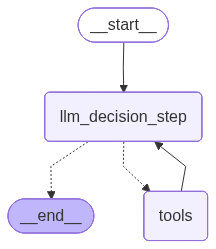

In [47]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [48]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

## Run the LangGraph (ReAct-style tool loop)
Below we invoke the compiled graph with a user question. The graph will:
1) Ask the LLM what to do
2) Call tools if needed
3) Feed tool outputs back to the LLM
4) Stop when the LLM returns a final answer

In [ ]:
result = react_graph.invoke({"messages": message})

# Print the final assistant answer
final_msg = result["messages"][-1]
print(final_msg.content)

# (Optional) Inspect tool calls made during the run
for i, msg in enumerate(result["messages"], start=1):
    tool_calls = getattr(msg, "tool_calls", None)
    if tool_calls:
        print(f"\nStep {i} tool_calls:")
        print(tool_calls)

In [53]:
import yfinance as yf

In [54]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [ ]:
@tool
def get_stock_previous_close(ticker: str) -> float:
    """Fetch the previous closing price as a numeric value (float)."""
    stock = yf.Ticker(ticker)
    price = stock.info.get("previousClose")
    if price is None:
        raise ValueError(f"Could not fetch previousClose for ticker '{ticker}'.")
    return float(price)

In [55]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $273.67.'

In [56]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $481.20.'

In [57]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000020E35493C40>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000020E35491C60>),
 StructuredTool(name='divide', description='Divide two integers.\nArgs:\n       a (int): The numerator.\n       b (int): The denominator (must not be 0).\n\n   Returns:\n       float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x0000020E35590220>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', 

In [ ]:
tools = [add, multiply, divide, search, get_stock_price, get_stock_previous_close]

In [59]:
llm_with_tools=llm.bind_tools(tools)

In [61]:
# Groq tool-calling can fail for some prompts/models ("tool_use_failed").
# For stock prices, call the tool directly with the correct Yahoo Finance ticker(s).
tickers_to_try = ["ADANIGREEN.NS", "ADANIGREEN.BO", "ADANIGREEN"]

response = None
for ticker in tickers_to_try:
	msg = get_stock_price.invoke(ticker)
	response = msg
	if ("Could not fetch price" not in msg) and ("An error occurred" not in msg):
		break

response

'The last closing price of ADANIGREEN.NS was $1020.80.'

In [64]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [65]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

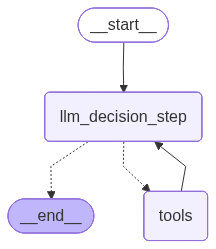

In [66]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

## Run the graph with Yahoo Finance tool
Example query that forces the graph to call the numeric stock tool and then do arithmetic.

In [ ]:
query = HumanMessage(
    content=(
        "Get the previous close prices of AAPL and TSLA using the tool, "
        "then add them and return the final number."
    )
)

result2 = react_graph2.invoke({"messages": [query]})
print(result2["messages"][-1].content)

# Notebook Summary

- This notebook demonstrates **tool calling with LangChain + Groq** using `ChatGroq` and how to **bind tools** (custom math tools + DuckDuckGo search).
- It then builds a **ReAct-style loop in LangGraph** using `StateGraph(MessagesState)` where the LLM decides whether to call tools via `tools_condition`, executes tools via `ToolNode`, and iterates until it produces a final answer.
- You visualized the graphs using Mermaid (`draw_mermaid_png`) to understand the control-flow between the LLM node and the tool node.
- You added a Yahoo Finance tool (via `yfinance`) and extended it with a **numeric-returning** helper tool to make arithmetic workflows easier.

**Key concepts covered**
- Tool definitions with `@tool` (schema + callable function)
- Tool binding with `llm.bind_tools(tools)`
- Inspecting tool calls via `response.tool_calls`
- Building LangGraph loops: `START -> llm_decision_step -> (tools?) -> llm_decision_step -> ... -> END`
- Combining multiple tools (search + math + finance) inside one agentic graph